## 1.数据集A和数据集B

### 1.EF

Mean ± Standard Deviation for each group and variable:
Variable                                 SCZ in dataset 1 (N=195)  SCZ in dataset 2 (N=94)   HC in dataset 1 (N=160)  
--------------------------------------------------------------------------------
Incongruent rt                           751.79 ± 148.57           723.42 ± 180.38           663.61 ± 148.79           
Interference Effect                      -23.01 ± 73.57            -58.19 ± 81.41            -7.09 ± 44.17             
Nogo Accuracy                            0.83 ± 0.12               0.82 ± 0.13               0.88 ± 0.11               
Switching Cost                           304.79 ± 303.01           257.48 ± 271.54           198.95 ± 238.02           
1750ms acc                               0.60 ± 0.25               0.49 ± 0.30               0.74 ± 0.21               
750ms acc                                0.51 ± 0.29               0.43 ± 0.31               0.66 ± 0.22               
Backward Digit Span      

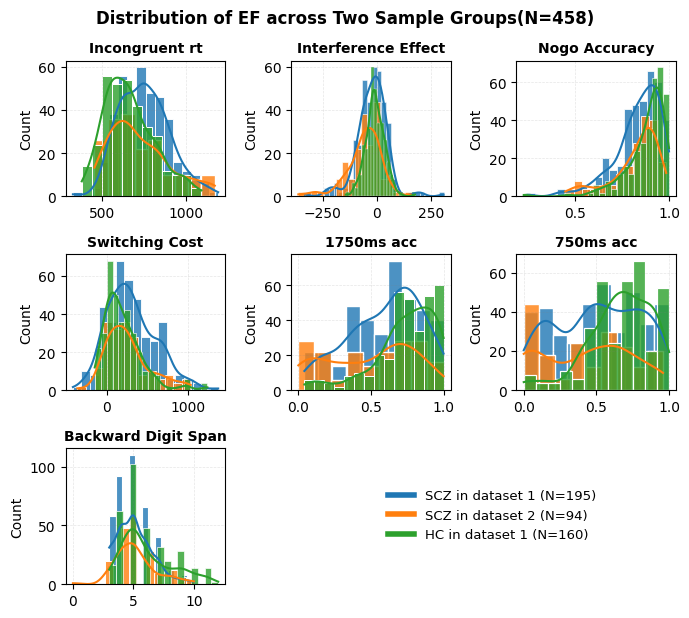

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 读取同一个Excel文件的多个sheet
df_A = pd.read_excel('数据集A和B.xlsx', sheet_name='Sheet1')  # 读取Sheet A
df_B = pd.read_excel('数据集A和B.xlsx', sheet_name='Sheet1')  # 读取Sheet B
# 如果需要添加Sheet C：
df_C = pd.read_excel('数据集A和B.xlsx', sheet_name='Sheet1')  # 读取Sheet C

# 合并数据集A和B（或A、B、C根据需求）
df = pd.concat([df_A, df_B], ignore_index=True)  # 可以根据需要添加df_C

# 按组分离数据
grouped_data = {group: df[df['Group'] == group] for group in df['Group'].unique()}

# 前测变量列表
pre_test_columns = [
    'reaction times in incongruent stimuli', 
    'stroop interference effect', 
    'accuracy in Nogo trials', 
    'Switching cost', 
    'accuracy in 1,750 ms', 
    'accuracy in 750 ms', 
    'span in digit span backward task'
]

# 字段映射：中文字段 -> 英文字段
field_mapping = {
    'reaction times in incongruent stimuli': 'Incongruent rt',
    'stroop interference effect': 'Interference Effect',
    'accuracy in Nogo trials': 'Nogo Accuracy',
    'Switching cost': 'Switching Cost',
    'accuracy in 1,750 ms': '1750ms acc',
    'accuracy in 750 ms': '750ms acc',
    'span in digit span backward task': 'Backward Digit Span'
}

# 分组数据
group_labels = {
    'A': "SCZ in dataset 1 (N=195)",
    'B': "SCZ in dataset 2 (N=94)",
    'C': "HC in dataset 1 (N=160)"  # 如果有Sheet C，可以在这里添加
}

# 输出三线表
print("Mean ± Standard Deviation for each group and variable:")
# 打印表头
header = ["Variable", group_labels['A'], group_labels['B'], group_labels['C']]  # 如果有Group C，加入
print(f"{'='*80}")
print(f"{header[0]:<40} {header[1]:<25} {header[2]:<25} {header[3]:<25}")
print(f"{'-'*80}")

# 计算并打印每个变量的均值和标准差
for col in pre_test_columns:
    print(f"{field_mapping[col]:<40}", end=' ')
    for group in ['A', 'B', 'C']:  # 如果有Group C，加入
        mean_val = grouped_data[group][col].mean()
        std_val = grouped_data[group][col].std()
        print(f"{mean_val:.2f} ± {std_val:.2f}".ljust(25), end=' ')  # Align the output
    print()

# 打印分隔线
print(f"{'='*80}")

# 根据变量数量动态创建子图网格
num_vars = len(pre_test_columns)
num_rows = (num_vars + 1) // 2  # 计算行数
num_cols = 3  # 固定列数为3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(7, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# Nature风格的调色板（根据期刊配色）
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 蓝色、橙色、绿色

# 绘制每个变量的直方图
for i, col in enumerate(pre_test_columns):
    for j, (group, data) in enumerate(grouped_data.items()):
        sns.histplot(data[col], ax=axs[i], kde=True, 
                     color=color_palette[j], line_kws={"color": "black", "lw": 1.5}, 
                     edgecolor="white", alpha=0.8)
    axs[i].set_title(field_mapping[col], fontsize=10, fontweight="bold")  # 使用英文标题
    axs[i].set_xlabel('')  # 删除X轴标签
    axs[i].tick_params(labelsize=10)
    axs[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2)  # 添加网格线

# 删除多余的子图
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加总的图例，调整位置和边距
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=4) for j in range(len(group_labels))]
fig.legend(handles, group_labels.values(), loc='lower center', fontsize=9.5, frameon=False,
           ncol=1, bbox_to_anchor=(0.71, 0.3))

plt.suptitle('Distribution of EF across Two Sample Groups(N=458)', fontsize=12, fontweight='bold', y=0.98)

# 调整布局以减少图之间的距离
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)  # 调整为合适的间距

# 保存高分辨率图像
plt.savefig("./分布比较图/数据集A和B的EF.jpg", dpi=1200, bbox_inches="tight")
plt.show()

Mean ± Standard Deviation for each group and variable:
Variable                                 SCZ in dataset 1 (N=195)  SCZ in dataset 2 (N=160)  HC in dataset 1 (N=160)  
--------------------------------------------------------------------------------
Age                                      35.35 ± 9.34              37.31 ± 9.46              37.69 ± 13.69             
Gender                                   1.42 ± 0.49               1.52 ± 0.50               1.48 ± 0.50               
Education years                          11.12 ± 4.56              11.22 ± 3.77              10.90 ± 3.94              


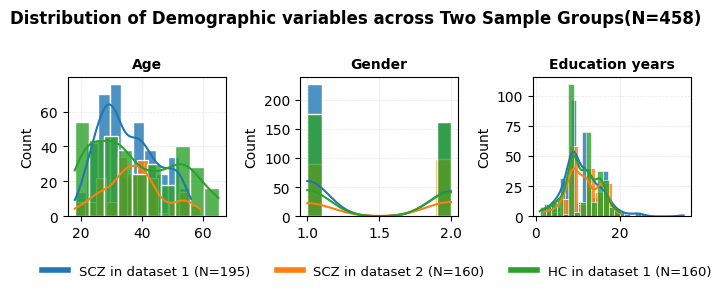


Gender Statistics by Group:

SCZ in dataset 1 (N=195):
  Male Count: 228
  Female Count: 162
  Male Percentage: 58.46%
  Female Percentage: 41.54%

SCZ in dataset 2 (N=160):
  Male Count: 90
  Female Count: 98
  Male Percentage: 47.87%
  Female Percentage: 52.13%

HC in dataset 1 (N=160):
  Male Count: 176
  Female Count: 162
  Male Percentage: 52.07%
  Female Percentage: 47.93%


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 读取同一个Excel文件的多个sheet
df_A = pd.read_excel('数据集A和B.xlsx', sheet_name='Sheet1')  # 读取Sheet A
df_B = pd.read_excel('数据集A和B.xlsx', sheet_name='Sheet1')  # 读取Sheet B
# 如果需要添加Sheet C：
df_C = pd.read_excel('数据集A和B.xlsx', sheet_name='Sheet1')  # 读取Sheet C

# 合并数据集A和B（或A、B、C根据需求）
df = pd.concat([df_A, df_B], ignore_index=True)  # 可以根据需要添加df_C

# 按组分离数据
grouped_data = {group: df[df['Group'] == group] for group in df['Group'].unique()}

# 新的变量列表
pre_test_columns = [
    'Age', 
    'Gender', 
    'Education years'
]

# 字段映射：中文字段 -> 英文字段
field_mapping = {
    'Age': 'Age',
    'Gender': 'Gender',
    'Education years': 'Education years'
}

# 分组数据
group_labels = {
    'A': "SCZ in dataset 1 (N=195)",
    'B': "SCZ in dataset 2 (N=160)",
    'C': "HC in dataset 1 (N=160)"  # 如果有Sheet C，可以在这里添加
}

# 输出三线表
print("Mean ± Standard Deviation for each group and variable:")
# 打印表头
header = ["Variable", group_labels['A'], group_labels['B'], group_labels['C']]  # 如果有Group C，加入
print(f"{'='*80}")
print(f"{header[0]:<40} {header[1]:<25} {header[2]:<25} {header[3]:<25}")
print(f"{'-'*80}")

# 计算并打印每个变量的均值和标准差
for col in pre_test_columns:
    print(f"{field_mapping[col]:<40}", end=' ')
    for group in ['A', 'B', 'C']:  # 如果有Group C，加入
        mean_val = grouped_data[group][col].mean()
        std_val = grouped_data[group][col].std()
        print(f"{mean_val:.2f} ± {std_val:.2f}".ljust(25), end=' ')  # Align the output
    print()

# 打印分隔线
print(f"{'='*80}")

# 根据变量数量动态创建子图网格
num_vars = len(pre_test_columns)
num_rows = (num_vars + 1) // 2  # 计算行数
num_cols = 3  # 固定列数为3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(7, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# Nature风格的调色板（根据期刊配色）
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 蓝色、橙色、绿色

# 绘制每个变量的直方图
for i, col in enumerate(pre_test_columns):
    for j, (group, data) in enumerate(grouped_data.items()):
        sns.histplot(data[col], ax=axs[i], kde=True, 
                     color=color_palette[j], line_kws={"color": "black", "lw": 1.5}, 
                     edgecolor="white", alpha=0.8)
    axs[i].set_title(field_mapping[col], fontsize=10, fontweight="bold")  # 使用英文标题
    axs[i].set_xlabel('')  # 删除X轴标签
    axs[i].tick_params(labelsize=10)
    axs[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2)  # 添加网格线

# 删除多余的子图
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加总的图例，调整位置和边距
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=4) for j in range(len(group_labels))]
fig.legend(handles, group_labels.values(), loc='lower center', fontsize=9.5, frameon=False,
           ncol=3, bbox_to_anchor=(0.53, 0.3))

plt.suptitle('Distribution of Demographic variables across Two Sample Groups(N=458)', fontsize=12, fontweight='bold', y=1.001)

# 调整布局以减少图之间的距离
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)  # 调整为合适的间距

# 保存高分辨率图像
plt.savefig("./分布比较图/数据集A和B的社会人口.jpg", dpi=1200, bbox_inches="tight")
plt.show()


# 统计性别：计算每个组别的男性（1）和女性（2）人数与比例
gender_stats = {}
for group in grouped_data.keys():
    group_data = grouped_data[group]
    male_count = (group_data['Gender'] == 1).sum()
    female_count = (group_data['Gender'] == 2).sum()
    total_count = len(group_data)
    
    male_percentage = (male_count / total_count) * 100
    female_percentage = (female_count / total_count) * 100
    
    gender_stats[group] = {
        "Male Count": male_count,
        "Female Count": female_count,
        "Male Percentage": male_percentage,
        "Female Percentage": female_percentage
    }

# 打印性别统计信息
print("\nGender Statistics by Group:")
for group, stats in gender_stats.items():
    print(f"\n{group_labels.get(group, group)}:")
    print(f"  Male Count: {stats['Male Count']}")
    print(f"  Female Count: {stats['Female Count']}")
    print(f"  Male Percentage: {stats['Male Percentage']:.2f}%")
    print(f"  Female Percentage: {stats['Female Percentage']:.2f}%")

Mean ± Standard Deviation for each group and variable:
Variable                                 SCZ in dataset 1 (N=195)  SCZ in dataset 2 (N=160) 
--------------------------------------------------------------------------------
PANSS Positive                           22.01 ± 4.47              19.99 ± 6.74              
PANSS Negative                           21.42 ± 6.49              20.06 ± 6.49              
PANSS General                            40.30 ± 6.82              37.35 ± 13.39             
PANSS Total                              83.72 ± 13.86             77.40 ± 24.14             


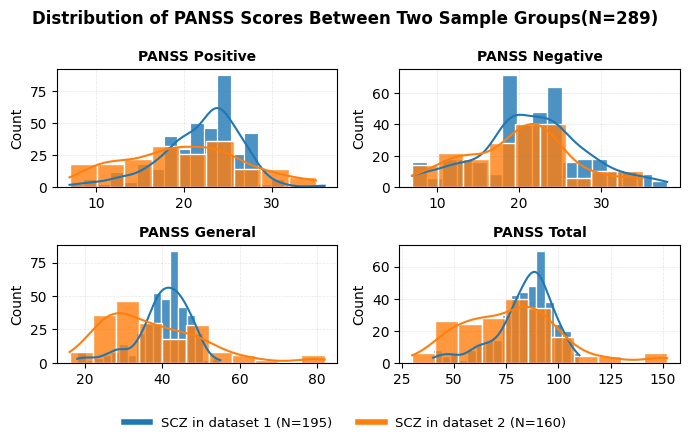

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 读取同一个Excel文件的多个sheet
df_A = pd.read_excel('数据集A和B.xlsx', sheet_name='Sheet2')  # 读取Sheet A
df_B = pd.read_excel('数据集A和B.xlsx', sheet_name='Sheet2')  # 读取Sheet B
# 如果需要添加Sheet C，您可以注释掉相关代码
# df_C = pd.read_excel('数据集A和B.xlsx', sheet_name='Sheet1')  # 读取Sheet C

# 合并数据集A和B
df = pd.concat([df_A, df_B], ignore_index=True)  # 只合并A和B

# 按组分离数据
grouped_data = {group: df[df['Group'] == group] for group in df['Group'].unique()}

# 前测变量列表（PANSS相关）
pre_test_columns = [
    'PANSS Positive', 
    'PANSS Negative', 
    'PANSS General',
    'PANSS-T'
]

# 字段映射：中文字段 -> 英文字段
field_mapping = {
    'PANSS Positive': 'PANSS Positive',
    'PANSS Negative': 'PANSS Negative',
    'PANSS General': 'PANSS General',
    'PANSS-T': 'PANSS Total'
}

# 分组数据
group_labels = {
    'A': "SCZ in dataset 1 (N=195)",
    'B': "SCZ in dataset 2 (N=160)"
}

# 输出三线表
print("Mean ± Standard Deviation for each group and variable:")
# 打印表头
header = ["Variable", group_labels['A'], group_labels['B']]
print(f"{'='*80}")
print(f"{header[0]:<40} {header[1]:<25} {header[2]:<25}")
print(f"{'-'*80}")

# 计算并打印每个变量的均值和标准差
for col in pre_test_columns:
    print(f"{field_mapping[col]:<40}", end=' ')
    for group in ['A', 'B']:  # 只对比组A和B
        mean_val = grouped_data[group][col].mean()
        std_val = grouped_data[group][col].std()
        print(f"{mean_val:.2f} ± {std_val:.2f}".ljust(25), end=' ')  # Align the output
    print()

# 打印分隔线
print(f"{'='*80}")

# 根据变量数量动态创建子图网格
num_vars = len(pre_test_columns)
num_rows = (num_vars + 1) // 2  # 计算行数
num_cols = 2  # 现在只对比A和B，所以列数设置为2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(7, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# 调色板（蓝色和橙色对比）
color_palette = ['#1f77b4', '#ff7f0e']  # 蓝色和橙色

# 绘制每个变量的直方图
for i, col in enumerate(pre_test_columns):
    for j, (group, data) in enumerate(grouped_data.items()):
        sns.histplot(data[col], ax=axs[i], kde=True, 
                     color=color_palette[j], line_kws={"color": "black", "lw": 1.5}, 
                     edgecolor="white", alpha=0.8)
    axs[i].set_title(field_mapping[col], fontsize=10, fontweight="bold")  # 使用英文标题
    axs[i].set_xlabel('')  # 删除X轴标签
    axs[i].tick_params(labelsize=10)
    axs[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2)  # 添加网格线

# 删除多余的子图
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加总的图例，调整位置和边距
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=4) for j in range(len(group_labels))]
fig.legend(handles, group_labels.values(), loc='lower center', fontsize=9.5, frameon=False,
           ncol=2, bbox_to_anchor=(0.5, -0.1))  # 只需要2列图例

plt.suptitle('Distribution of PANSS Scores Between Two Sample Groups(N=289)', fontsize=12, fontweight='bold', y=0.98)

# 调整布局以减少图之间的距离89)
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)  # 调整为合适的间距

# 保存高分辨率图像
plt.savefig("./分布比较图/数据集A和B的PANSS.jpg", dpi=1200, bbox_inches="tight")
plt.show()

### 2.人口和临床

## 2.干预三组基线

### 1.EF

Mean ± Standard Deviation for each group and variable:
Variable                                 WM training group(N=32)   Simpler response group(N=33) Routine medication group(N=29)
--------------------------------------------------------------------------------
Incongruent rt                           724.08 ± 196.03           726.57 ± 177.77           718.95 ± 172.81           
Interference Effect                      -60.31 ± 65.98            -63.01 ± 96.35            -50.35 ± 81.27            
Backward Digit Span                      5.34 ± 1.36               5.18 ± 1.65               4.93 ± 2.12               
1750ms acc                               0.57 ± 0.27               0.46 ± 0.30               0.43 ± 0.33               
750ms acc                                0.51 ± 0.27               0.39 ± 0.29               0.40 ± 0.35               
Switching Cost                           257.61 ± 233.15           268.01 ± 298.30           245.37 ± 289.92           
Nogo Accuracy    

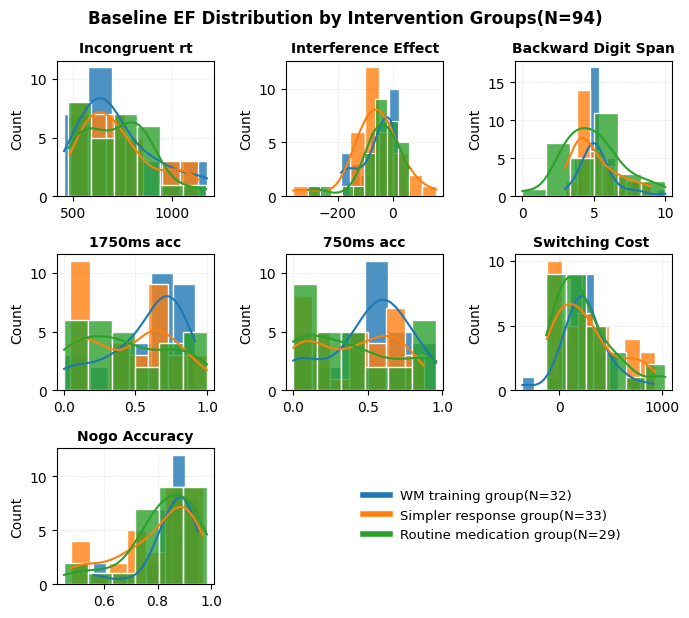

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取新的数据
df = pd.read_excel('rawdata.xlsx')

# 按组分离数据
grouped_data = {group: df[df['Group'] == group] for group in df['Group'].unique()}

# 前测变量列表
pre_test_columns = [
    '不一致前测', '干扰效应前测',  '数字倒背前测', 
    '1750前测', '750前测', '转换代价前测', 'nogoacc前测'
]

# 字段映射：中文字段 -> 英文字段
field_mapping = {
    '不一致前测': 'Incongruent rt',
    '干扰效应前测': 'Interference Effect',
    '数字倒背前测': 'Backward Digit Span',
    '1750前测': '1750ms acc',
    '750前测': '750ms acc',
    '转换代价前测': 'Switching Cost ',
    'nogoacc前测': 'Nogo Accuracy'
}

# 分组数据
group_labels = {
    1: "WM training group(N=32)",
    2: "Simpler response group(N=33)",
    3: "Routine medication group(N=29)"
}

# 输出三线表
print("Mean ± Standard Deviation for each group and variable:")
# 打印表头
header = ["Variable", group_labels[1], group_labels[2], group_labels[3]]
print(f"{'='*80}")
print(f"{header[0]:<40} {header[1]:<25} {header[2]:<25} {header[3]:<25}")
print(f"{'-'*80}")

# 计算并打印每个变量的均值和标准差
for col in pre_test_columns:
    print(f"{field_mapping[col]:<40}", end=' ')
    for group in range(1, 4):
        mean_val = grouped_data[group][col].mean()
        std_val = grouped_data[group][col].std()
        print(f"{mean_val:.2f} ± {std_val:.2f}".ljust(25), end=' ')  # Align the output
    print()

# 打印分隔线
print(f"{'='*80}")

# 根据变量数量动态创建子图网格
num_vars = len(pre_test_columns)
num_rows = (num_vars + 1) //2 # 计算行数
num_cols =3  # 固定列数为2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(7, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# Nature风格的调色板（根据期刊配色）
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 蓝色、橙色、绿色

# 每组的样本量
group_labels = {
    1: "WM training group(N=32)",
    2: "Simpler response group(N=33)",
    3: "Routine medication group(N=29)"
}

# 绘制每个变量的直方图
for i, col in enumerate(pre_test_columns):
    for j, (group, data) in enumerate(grouped_data.items()):
        sns.histplot(data[col], ax=axs[i], kde=True, 
                     color=color_palette[j], line_kws={"color": "black", "lw": 1.5}, 
                     edgecolor="white", alpha=0.8)
    axs[i].set_title(field_mapping[col], fontsize=10, fontweight="bold")  # 使用英文标题
    axs[i].set_xlabel('')  # 删除X轴标签
    axs[i].tick_params(labelsize=10)
    axs[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2)  # 添加网格线

# 删除多余的子图
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加总的图例，调整位置和边距
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=4) for j in range(len(group_labels))]
fig.legend(handles, group_labels.values(), loc='lower center', fontsize=9.5, frameon=False,
           ncol=1, bbox_to_anchor=(0.71, 0.3))

plt.suptitle('Baseline EF Distribution by Intervention Groups(N=94)', fontsize=12, fontweight='bold', y=0.98)

# 调整布局以减少图之间的距离
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)  # 调整为合适的间距

# 保存高分辨率图像
plt.savefig("./分布比较图/三组被试EF前测.jpg", dpi=600, bbox_inches="tight")
plt.show()

### 2.人口和临床

Mean ± Standard Deviation for each group and variable:
Variable                                 WM training group(N=32)   Simpler response group(N=33) Routine medication group(N=29)
--------------------------------------------------------------------------------
Age                                      38.56 ± 10.06             36.97 ± 9.35              36.31 ± 9.16              
Education years                          11.56 ± 3.83              10.75 ± 3.72              11.34 ± 3.87              
Gender                                   1.53 ± 0.51               1.48 ± 0.51               1.55 ± 0.51               
Duration of 
illness (years)             12.02 ± 7.92              11.70 ± 8.48              12.84 ± 9.72              
Olanzapine equivalent
 dosage (mg/day)   12.59 ± 6.49              13.13 ± 6.07              13.24 ± 5.94              
PANSS Positive                           19.25 ± 6.29              21.30 ± 6.09              19.31 ± 7.90              
PANSS Negative   

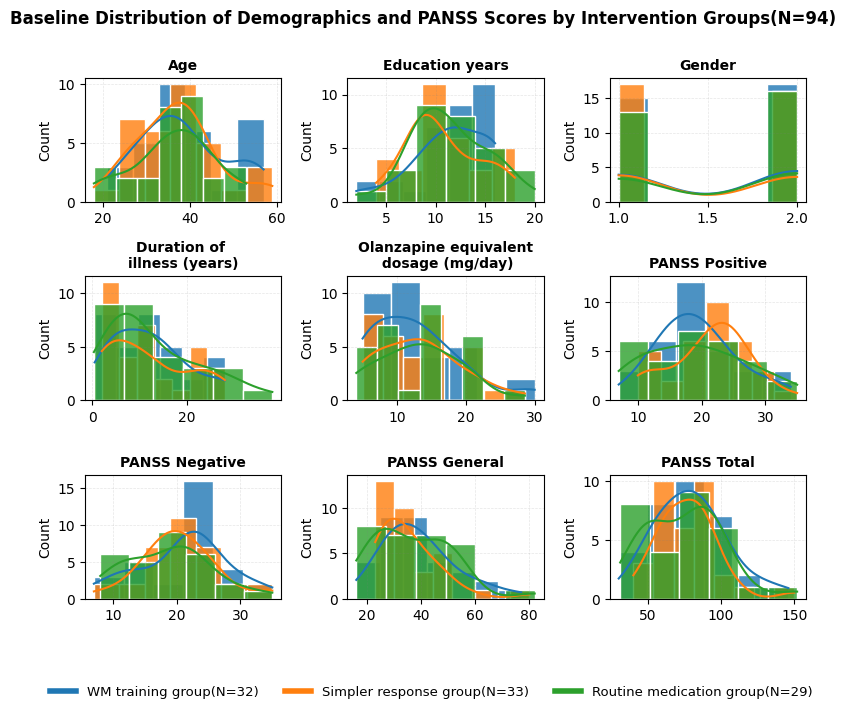

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取新的数据
df = pd.read_excel('rawdata.xlsx')

# 按组分离数据
grouped_data = {group: df[df['Group'] == group] for group in df['Group'].unique()}

# 新的变量列表
variables = [
    'Age', 'Education years',  'Gender', '病程（年）', 
    '奥氮平当量（mg/day）', 'PANSS-positive at baseline', 'PANSS-negative at baseline', 
    'PANSS -G at baseline', 'PANSS -T at baseline'
]

# 字段映射：中文字段 -> 英文字段
field_mapping = {
    'Age': 'Age',
    'Education years': 'Education years',
    'Gender': 'Gender',
    '病程（年）': 'Duration of \nillness (years)',
    '奥氮平当量（mg/day）': 'Olanzapine equivalent\n dosage (mg/day)',
    'PANSS-positive at baseline': 'PANSS Positive',
    'PANSS-negative at baseline': 'PANSS Negative',
    'PANSS -G at baseline': 'PANSS General',
    'PANSS -T at baseline': 'PANSS Total'
}

# 分组数据
group_labels = {
    1: "WM training group(N=32)",
    2: "Simpler response group(N=33)",
    3: "Routine medication group(N=29)"
}

# 输出三线表
print("Mean ± Standard Deviation for each group and variable:")
# 打印表头
header = ["Variable", group_labels[1], group_labels[2], group_labels[3]]
print(f"{'='*80}")
print(f"{header[0]:<40} {header[1]:<25} {header[2]:<25} {header[3]:<25}")
print(f"{'-'*80}")

# 计算并打印每个变量的均值和标准差
for col in variables:
    print(f"{field_mapping[col]:<40}", end=' ')
    for group in range(1, 4):
        mean_val = grouped_data[group][col].mean()
        std_val = grouped_data[group][col].std()
        print(f"{mean_val:.2f} ± {std_val:.2f}".ljust(25), end=' ')  # Align the output
    print()

# 打印分隔线
print(f"{'='*80}")

# 统计性别：计算每个组别的男性（1）和女性（2）人数与比例
gender_stats = {}
for group in grouped_data.keys():
    group_data = grouped_data[group]
    male_count = (group_data['Gender'] == 1).sum()
    female_count = (group_data['Gender'] == 2).sum()
    total_count = len(group_data)
    
    male_percentage = (male_count / total_count) * 100
    female_percentage = (female_count / total_count) * 100
    
    gender_stats[group] = {
        "Male Count": male_count,
        "Female Count": female_count,
        "Male Percentage": male_percentage,
        "Female Percentage": female_percentage
    }

# 输出性别统计结果
print(f"\n{'='*80}")
print(f"{'Group':<30}{'Male Count':<15}{'Female Count':<15}{'Male Percentage':<20}{'Female Percentage':<20}")
print(f"{'-'*80}")
for group in gender_stats.keys():
    stats = gender_stats[group]
    print(f"{group_labels[group]:<30}{stats['Male Count']:<15}{stats['Female Count']:<15}{stats['Male Percentage']:.2f}%".ljust(40) + f"{stats['Female Percentage']:.2f}%")
print(f"{'='*80}")
# 根据变量数量动态创建子图网格
num_vars = len(variables)
num_rows = (num_vars + 1) // 2  # 计算行数
num_cols = 3  # 固定列数为2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# Nature风格的调色板（根据期刊配色）
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 蓝色、橙色、绿色

# 绘制每个变量的直方图
for i, col in enumerate(variables):
    for j, (group, data) in enumerate(grouped_data.items()):
        sns.histplot(data[col], ax=axs[i], kde=True, 
                     color=color_palette[j], line_kws={"color": "black", "lw": 1.5}, 
                     edgecolor="white", alpha=0.8)
    axs[i].set_title(field_mapping[col], fontsize=10, fontweight="bold")  # 使用英文标题
    axs[i].set_xlabel('')  # 删除X轴标签
    axs[i].tick_params(labelsize=10)
    axs[i].grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2)  # 添加网格线

# 删除多余的子图
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加总的图例，调整位置和边距
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=4) for j in range(len(group_labels))]
fig.legend(handles, group_labels.values(), loc='lower center', fontsize=9.5, frameon=False,
           ncol=3, bbox_to_anchor=(0.51, 0.3))

plt.suptitle('Baseline Distribution of Demographics and PANSS Scores by Intervention Groups(N=94)', fontsize=12, fontweight='bold', y=1.001)

# 调整布局以减少图之间的距离
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)  # 调整为合适的间距

# 保存高分辨率图像
plt.savefig("./分布比较图/三组被试人口和病历.jpg", dpi=600, bbox_inches="tight")
plt.show()


## 3.干预追踪和流失